In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
!pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *
import os
import pandas as pd

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for squad contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/squad/squad.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# os.listdir('drive/MyDrive/Quotes')

In [ ]:
%cd /content/drive/MyDrive/Quotes

/content/drive/MyDrive/Quotes


In [ ]:
os.listdir()

NameError: name 'os' is not defined

# Data Preprocessing

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('quotes_data.csv')

In [ ]:
df.columns

Index(['Quote', 'Author', 'Category', 'Url', 'Tags'], dtype='object')

In [ ]:
df['Tags'].unique()

array(["['Age', 'Mind', 'Matter', 'Over', 'Issue']",
       "['Birthday', 'Age', 'Man', 'Never', 'Woman']",
       "['Age', 'Youth', 'Young', 'Wasted']", ...,
       "['Work', 'Black', 'Shades', 'Three']",
       "['Work', 'Hard Work', 'Hard', 'Sweat', 'More']",
       "['Work', 'Dominate', 'Niche', 'Mean', 'Just']"], dtype=object)

In [ ]:
len(df)

101243

In [ ]:
df.shape

(101243, 5)

In [ ]:
df.isna().sum()

Quote       0
Author      0
Category    0
Url         0
Tags        0
dtype: int64

In [ ]:
df.duplicated().sum()

32

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.reset_index(drop = True, inplace = True)

In [ ]:
df.shape

(101211, 5)

In [ ]:
df.columns

Index(['Quote', 'Author', 'Category', 'Url', 'Tags'], dtype='object')

In [ ]:
tags_list = df.Tags.to_list()
tag_count = {}
for tags in tags_list:
  tag_list = eval(tags)
  for tag in tag_list:
    if tag in tag_count.keys():
      tag_count[tag] += 1
    else:
      tag_count[tag] = 1
print(len(tag_count))

9129


In [ ]:
print(tag_count.values())

dict_values([1871, 1295, 201, 366, 9, 840, 3249, 2443, 383, 284, 813, 12, 17, 529, 643, 394, 3091, 449, 170, 127, 1544, 33, 478, 678, 49, 83, 1379, 159, 909, 701, 5, 384, 2, 165, 248, 1512, 26, 156, 804, 2, 47, 1473, 41, 65, 122, 27, 58, 4, 35, 4, 1, 3257, 213, 62, 638, 53, 27, 2364, 4304, 16, 7553, 2112, 134, 62, 5508, 1268, 115, 283, 5, 844, 8270, 527, 3, 2, 75, 404, 120, 121, 3, 1, 1, 60, 1, 179, 6159, 109, 123, 1185, 2761, 1671, 866, 65, 311, 1556, 24, 2324, 4505, 2032, 390, 5807, 2118, 825, 498, 46, 375, 6176, 63, 166, 91, 605, 419, 695, 2089, 487, 967, 5, 1669, 106, 636, 19, 12, 1610, 12, 3, 46, 664, 21, 221, 668, 3, 1163, 6, 1996, 97, 144, 2, 759, 1810, 20, 48, 12, 9, 1, 19, 160, 39, 166, 14, 255, 111, 485, 7, 202, 220, 66, 43, 14, 94, 964, 1265, 154, 1608, 681, 5, 134, 420, 87, 55, 7, 2, 1502, 32, 28, 54, 92, 808, 727, 27, 4, 17, 8, 162, 37, 2292, 1813, 612, 760, 29, 490, 251, 929, 7, 559, 13, 133, 2577, 11, 3, 430, 76, 92, 101, 440, 1, 2026, 12, 48, 374, 20, 7, 648, 489, 191, 

In [ ]:
th = int(len(df)*0.001)
print(th)

101


In [ ]:
rare_tags = [tags for tags, value in tag_count.items() if value < th]

In [ ]:
len(rare_tags)

8454

In [ ]:
total_tags = list(tag_count.keys())

In [ ]:
print(type(total_tags), type(rare_tags))

<class 'list'> <class 'list'>


In [ ]:
actual_tags = list(set(total_tags) - set(rare_tags))

In [ ]:
len(actual_tags)

675

In [ ]:
print(sorted(actual_tags))

['Ability', 'About', 'Accept', 'Achieve', 'Achievement', 'Act', 'Acting', 'Action', 'Advice', 'Afraid', 'Again', 'Age', 'Ahead', 'Aim', 'Alive', 'Alone', 'Always', 'Am', 'Amazing', 'Ambition', 'America', 'American', 'Anger', 'Angry', 'Anniversary', 'Any', 'Anything', 'Architecture', 'Army', 'Art', 'Artist', 'Attention', 'Attitude', 'Away', 'Back', 'Bad', 'Balance', 'Battle', 'Beautiful', 'Beauty', 'Because', 'Become', 'Been', 'Before', 'Beginning', 'Behavior', 'Being', 'Belief', 'Believe', 'Best', 'Better', 'Beyond', 'Bible', 'Big', 'Birth', 'Birthday', 'Black', 'Blessed', 'Blood', 'Body', 'Book', 'Born', 'Brain', 'Brainy', 'Brave', 'Bring', 'Brother', 'Build', 'Building', 'Business', 'Busy', 'Cannot', 'Car', 'Care', 'Career', 'Celebrate', 'Challenges', 'Chance', 'Change', 'Character', 'Child', 'Childhood', 'Children', 'Choice', 'Choices', 'Christmas', 'Church', 'Cinema', 'City', 'Cold', 'College', 'Come', 'Comedy', 'Commitment', 'Communication', 'Community', 'Company', 'Competition', 

In [ ]:
tags_list = df.Tags.to_list()
revised_tag_list = []
indices_to_drop = []

for idx, tags in enumerate(tags_list):
  tag_list = eval(tags)
  revised_tags = []

  for tag in tag_list:
    if tag in actual_tags:
      revised_tags.append(tag)

  if len(revised_tags) == 0:
    indices_to_drop.append(idx)
  else:
    revised_tag_list.append(revised_tags)

df = df.drop(indices_to_drop).reset_index(drop=True)
df['revised_tags'] = revised_tag_list
df.shape

(101201, 6)

In [ ]:
df.tail()

,Quote,Author,Category,Url,Tags,revised_tags
101196,A manager is not a person who can do the work better than his men; he is a person who can get his men to do the work better than he can.,Frederick W. Smith,Work,https://www.brainyquote.com/quotes/frederick_w_smith_201583?src=t_work,"['Work', 'Men', 'Better', 'Person', 'Who']","[Work, Men, Better, Person, Who]"
101197,The sweat of hard work is not to be displayed. It is much more graceful to appear favored by the gods.,Maxine Hong Kingston,Work,https://www.brainyquote.com/quotes/maxine_hong_kingston_204858?src=t_work,"['Work', 'Hard Work', 'Hard', 'Sweat', 'More']","[Work, Hard Work, Hard, More]"
101198,"Identify your niche and dominate it. And when I say dominate, I just mean work harder than anyone else could possibly work at it.",Nate Parker,Work,https://www.brainyquote.com/quotes/nate_parker_538454?src=t_work,"['Work', 'Dominate', 'Niche', 'Mean', 'Just']","[Work, Mean, Just]"
101199,"Loyal and efficient work in a great cause, even though it may not be immediately recognized, ultimately bears fruit.",Jawaharlal Nehru,Work,https://www.brainyquote.com/quotes/jawaharlal_nehru_390491?src=t_work,"['Work', 'Great', 'Fruit', 'Even', 'Cause']","[Work, Great, Fruit, Even]"
101200,"Fabrics such as raw silk, velvet, shimmer, satin and georgette work well for the wedding season.",Masaba Gupta,Work,https://www.brainyquote.com/quotes/masaba_gupta_1125086?src=t_work,"['Work', 'Wedding', 'Fabrics', 'Velvet', 'Well']","[Work, Wedding, Well]"


In [ ]:
revised_tags_list = df.revised_tags.to_list()
revised_tag_count = {}
for tags in revised_tags_list:
  tag_list = tags
  for tag in tag_list:
    if tag in revised_tag_count.keys():
      revised_tag_count[tag] += 1
    else:
      revised_tag_count[tag] = 1
print(f"Number of Genres: {len(revised_tag_count)}")
print(revised_tag_count)

Number of Genres: 675
{'Age': 1871, 'Mind': 1295, 'Matter': 201, 'Over': 366, 'Birthday': 840, 'Man': 3249, 'Never': 2443, 'Woman': 383, 'Youth': 284, 'Young': 813, 'Help': 529, 'Old': 643, 'Get': 394, 'Men': 3091, 'Grow': 449, 'Attention': 170, 'Pay': 127, 'Strength': 1544, 'Opportunity': 478, 'Remember': 678, 'Morning': 1379, 'Wake Up': 159, 'School': 909, 'Country': 701, 'Happy': 384, 'Child': 165, 'Lie': 248, 'Live': 1512, 'Old Age': 156, 'Place': 804, 'Nothing': 1473, 'High': 122, 'Best': 3257, 'Improve': 213, 'Soul': 638, 'Change': 2364, 'Great': 4304, 'People': 7553, 'I Am': 2112, 'Strange': 134, 'Me': 5508, 'Try': 1268, 'Environment': 115, 'Growing Up': 283, 'Up': 844, 'Life': 8270, 'End': 527, 'Wish': 404, 'Minds': 120, 'Order': 121, 'Very': 179, 'Time': 6159, 'Habit': 109, 'Busy': 123, 'Person': 1185, 'Women': 2761, 'Myself': 1671, 'Beautiful': 866, 'Purpose': 311, 'Learning': 1556, 'Art': 2324, 'Work': 4505, 'Nature': 2032, 'Gift': 390, 'Good': 5807, 'Believe': 2118, 'True':

In [ ]:
encode_tag_types = {key: idx for idx, (key, value) in enumerate(revised_tag_count.items())}
with open("tag_types_encoded.json", "w") as fp:
  json.dump(encode_tag_types, fp)

In [ ]:
print(encode_tag_types)

{'Age': 0, 'Mind': 1, 'Matter': 2, 'Over': 3, 'Birthday': 4, 'Man': 5, 'Never': 6, 'Woman': 7, 'Youth': 8, 'Young': 9, 'Help': 10, 'Old': 11, 'Get': 12, 'Men': 13, 'Grow': 14, 'Attention': 15, 'Pay': 16, 'Strength': 17, 'Opportunity': 18, 'Remember': 19, 'Morning': 20, 'Wake Up': 21, 'School': 22, 'Country': 23, 'Happy': 24, 'Child': 25, 'Lie': 26, 'Live': 27, 'Old Age': 28, 'Place': 29, 'Nothing': 30, 'High': 31, 'Best': 32, 'Improve': 33, 'Soul': 34, 'Change': 35, 'Great': 36, 'People': 37, 'I Am': 38, 'Strange': 39, 'Me': 40, 'Try': 41, 'Environment': 42, 'Growing Up': 43, 'Up': 44, 'Life': 45, 'End': 46, 'Wish': 47, 'Minds': 48, 'Order': 49, 'Very': 50, 'Time': 51, 'Habit': 52, 'Busy': 53, 'Person': 54, 'Women': 55, 'Myself': 56, 'Beautiful': 57, 'Purpose': 58, 'Learning': 59, 'Art': 60, 'Work': 61, 'Nature': 62, 'Gift': 63, 'Good': 64, 'Believe': 65, 'True': 66, 'Light': 67, 'Night': 68, 'Love': 69, 'Does': 70, 'Everything': 71, 'How': 72, 'You': 73, 'Success': 74, 'Start': 75, 'C

In [ ]:
cat_tag_list = []
rev_tags_list = df.revised_tags.to_list()

for tags in rev_tags_list:
  cat_tags_list = [0]* len(encode_tag_types)
  for tag in tags:
    tag_type_idx = encode_tag_types[tag]
    cat_tags_list[tag_type_idx] = 1
  cat_tag_list.append(cat_tags_list)

In [ ]:
print(cat_tag_list[:5])

[[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
df['labels'] = cat_tag_list

In [ ]:
df.head()

,Quote,Author,Category,Url,Tags,revised_tags,labels
0,"Age is an issue of mind over matter. If you don't mind, it doesn't matter.",Mark Twain,Age,https://www.brainyquote.com/quotes/mark_twain_103892?src=t_age,"['Age', 'Mind', 'Matter', 'Over', 'Issue']","[Age, Mind, Matter, Over]","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,A diplomat is a man who always remembers a woman's birthday but never remembers her age.,Robert Frost,Age,https://www.brainyquote.com/quotes/robert_frost_107290?src=t_age,"['Birthday', 'Age', 'Man', 'Never', 'Woman']","[Birthday, Age, Man, Never, Woman]","[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
2,Youth is wasted on the young.,George Bernard Shaw,Age,https://www.brainyquote.com/quotes/george_bernard_shaw_131494?src=t_age,"['Age', 'Youth', 'Young', 'Wasted']","[Age, Youth, Young]","[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
3,"You can't help getting older, but you don't have to get old.",George Burns,Age,https://www.brainyquote.com/quotes/george_burns_103932?src=t_age,"['Age', 'Getting Older', 'Help', 'Old', 'Get']","[Age, Help, Old, Get]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
4,"As I grow older, I pay less attention to what men say. I just watch what they do.",Andrew Carnegie,Age,https://www.brainyquote.com/quotes/andrew_carnegie_106123?src=t_age,"['Age', 'Men', 'Grow', 'Attention', 'Pay']","[Age, Men, Grow, Attention, Pay]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"


In [ ]:
df.to_csv("prep_quotes.csv", index = False)

# Dataloader

In [ ]:
os.listdir()

['quotes_data.csv',
 'tag_types_encoded.json',
 'prep_quotes.csv',
 'dataloaders',
 'models',
 'quotes.ipynb']

In [ ]:
df = pd.read_csv('prep_quotes.csv')

In [ ]:
len(df)

101201

In [ ]:
df.head()

,Quote,Author,Category,Url,Tags,revised_tags,labels
0,"Age is an issue of mind over matter. If you don't mind, it doesn't matter.",Mark Twain,Age,https://www.brainyquote.com/quotes/mark_twain_103892?src=t_age,"['Age', 'Mind', 'Matter', 'Over', 'Issue']","['Age', 'Mind', 'Matter', 'Over']","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,A diplomat is a man who always remembers a woman's birthday but never remembers her age.,Robert Frost,Age,https://www.brainyquote.com/quotes/robert_frost_107290?src=t_age,"['Birthday', 'Age', 'Man', 'Never', 'Woman']","['Birthday', 'Age', 'Man', 'Never', 'Woman']","[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
2,Youth is wasted on the young.,George Bernard Shaw,Age,https://www.brainyquote.com/quotes/george_bernard_shaw_131494?src=t_age,"['Age', 'Youth', 'Young', 'Wasted']","['Age', 'Youth', 'Young']","[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
3,"You can't help getting older, but you don't have to get old.",George Burns,Age,https://www.brainyquote.com/quotes/george_burns_103932?src=t_age,"['Age', 'Getting Older', 'Help', 'Old', 'Get']","['Age', 'Help', 'Old', 'Get']","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
4,"As I grow older, I pay less attention to what men say. I just watch what they do.",Andrew Carnegie,Age,https://www.brainyquote.com/quotes/andrew_carnegie_106123?src=t_age,"['Age', 'Men', 'Grow', 'Attention', 'Pay']","['Age', 'Men', 'Grow', 'Attention', 'Pay']","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
import json
import numpy as np

In [ ]:
with open('tag_types_encoded.json', 'r') as file:
  tag_encoder = json.load(file)

In [ ]:
print(tag_encoder)

{'Age': 0, 'Mind': 1, 'Matter': 2, 'Over': 3, 'Birthday': 4, 'Man': 5, 'Never': 6, 'Woman': 7, 'Youth': 8, 'Young': 9, 'Help': 10, 'Old': 11, 'Get': 12, 'Men': 13, 'Grow': 14, 'Attention': 15, 'Pay': 16, 'Strength': 17, 'Opportunity': 18, 'Remember': 19, 'Morning': 20, 'Wake Up': 21, 'School': 22, 'Country': 23, 'Happy': 24, 'Child': 25, 'Lie': 26, 'Live': 27, 'Old Age': 28, 'Place': 29, 'Nothing': 30, 'High': 31, 'Best': 32, 'Improve': 33, 'Soul': 34, 'Change': 35, 'Great': 36, 'People': 37, 'I Am': 38, 'Strange': 39, 'Me': 40, 'Try': 41, 'Environment': 42, 'Growing Up': 43, 'Up': 44, 'Life': 45, 'End': 46, 'Wish': 47, 'Minds': 48, 'Order': 49, 'Very': 50, 'Time': 51, 'Habit': 52, 'Busy': 53, 'Person': 54, 'Women': 55, 'Myself': 56, 'Beautiful': 57, 'Purpose': 58, 'Learning': 59, 'Art': 60, 'Work': 61, 'Nature': 62, 'Gift': 63, 'Good': 64, 'Believe': 65, 'True': 66, 'Light': 67, 'Night': 68, 'Love': 69, 'Does': 70, 'Everything': 71, 'How': 72, 'You': 73, 'Success': 74, 'Start': 75, 'C

In [ ]:
labels = list(tag_encoder.keys())

In [ ]:
print(labels)

['Age', 'Mind', 'Matter', 'Over', 'Birthday', 'Man', 'Never', 'Woman', 'Youth', 'Young', 'Help', 'Old', 'Get', 'Men', 'Grow', 'Attention', 'Pay', 'Strength', 'Opportunity', 'Remember', 'Morning', 'Wake Up', 'School', 'Country', 'Happy', 'Child', 'Lie', 'Live', 'Old Age', 'Place', 'Nothing', 'High', 'Best', 'Improve', 'Soul', 'Change', 'Great', 'People', 'I Am', 'Strange', 'Me', 'Try', 'Environment', 'Growing Up', 'Up', 'Life', 'End', 'Wish', 'Minds', 'Order', 'Very', 'Time', 'Habit', 'Busy', 'Person', 'Women', 'Myself', 'Beautiful', 'Purpose', 'Learning', 'Art', 'Work', 'Nature', 'Gift', 'Good', 'Believe', 'True', 'Light', 'Night', 'Love', 'Does', 'Everything', 'How', 'You', 'Success', 'Start', 'Children', 'Who', 'Those', 'Face', 'Long', 'Important', 'Stop', 'Because', 'Heart', 'Always', 'Same', 'She', 'More', 'Something', 'Whatever', 'Early', 'Happens', 'Lose', 'Friend', 'Enemy', 'Only', 'Sad', 'Nice', 'Look', 'Father', 'Blood', 'Wife', 'Trust', 'Your', 'Our', 'Grace', 'Money', 'Healt

In [ ]:
model_name = "distilroberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls = model_cls, config = config)
hf_model.config.problem_type = "multi_label_classification"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

In [ ]:
df.columns

Index(['Quote', 'Author', 'Category', 'Url', 'Tags', 'revised_tags', 'labels'], dtype='object')

In [ ]:
df.dtypes

Quote           object
Author          object
Category        object
Url             object
Tags            object
revised_tags    object
labels          object
dtype: object

In [ ]:
def convert_to_int(arr):
  arr = np.array(eval(arr))
  return arr.astype(np.int64)

In [ ]:
df['labels'] = df['labels'].apply(convert_to_int)

In [ ]:
df.head()

,Quote,Author,Category,Url,Tags,revised_tags,labels
0,"Age is an issue of mind over matter. If you don't mind, it doesn't matter.",Mark Twain,Age,https://www.brainyquote.com/quotes/mark_twain_103892?src=t_age,"['Age', 'Mind', 'Matter', 'Over', 'Issue']","['Age', 'Mind', 'Matter', 'Over']","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,A diplomat is a man who always remembers a woman's birthday but never remembers her age.,Robert Frost,Age,https://www.brainyquote.com/quotes/robert_frost_107290?src=t_age,"['Birthday', 'Age', 'Man', 'Never', 'Woman']","['Birthday', 'Age', 'Man', 'Never', 'Woman']","[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
2,Youth is wasted on the young.,George Bernard Shaw,Age,https://www.brainyquote.com/quotes/george_bernard_shaw_131494?src=t_age,"['Age', 'Youth', 'Young', 'Wasted']","['Age', 'Youth', 'Young']","[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
3,"You can't help getting older, but you don't have to get old.",George Burns,Age,https://www.brainyquote.com/quotes/george_burns_103932?src=t_age,"['Age', 'Getting Older', 'Help', 'Old', 'Get']","['Age', 'Help', 'Old', 'Get']","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
4,"As I grow older, I pay less attention to what men say. I just watch what they do.",Andrew Carnegie,Age,https://www.brainyquote.com/quotes/andrew_carnegie_106123?src=t_age,"['Age', 'Men', 'Grow', 'Attention', 'Pay']","['Age', 'Men', 'Grow', 'Attention', 'Pay']","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"


In [ ]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded = True, vocab = labels))
dblock = DataBlock(blocks = blocks, get_x = ColReader('Quote'), get_y = ColReader('labels'), splitter = RandomSplitter(valid_pct = 0.2, seed = 42))

In [ ]:
dls = dblock.dataloaders(df, bs = 32)

In [ ]:
dls_path = "dataloaders"
if not os.path.exists(dls_path):
  os.makedirs(dls_path)
torch.save(dls, "dataloaders/dls-multilabel-quote-classifier.pkl")

In [ ]:
dls.vocab

['Age', 'Mind', 'Matter', 'Over', 'Birthday', 'Man', 'Never', 'Woman', 'Youth', 'Young', 'Help', 'Old', 'Get', 'Men', 'Grow', 'Attention', 'Pay', 'Strength', 'Opportunity', 'Remember', 'Morning', 'Wake Up', 'School', 'Country', 'Happy', 'Child', 'Lie', 'Live', 'Old Age', 'Place', 'Nothing', 'High', 'Best', 'Improve', 'Soul', 'Change', 'Great', 'People', 'I Am', 'Strange', 'Me', 'Try', 'Environment', 'Growing Up', 'Up', 'Life', 'End', 'Wish', 'Minds', 'Order', 'Very', 'Time', 'Habit', 'Busy', 'Person', 'Women', 'Myself', 'Beautiful', 'Purpose', 'Learning', 'Art', 'Work', 'Nature', 'Gift', 'Good', 'Believe', 'True', 'Light', 'Night', 'Love', 'Does', 'Everything', 'How', 'You', 'Success', 'Start', 'Children', 'Who', 'Those', 'Face', 'Long', 'Important', 'Stop', 'Because', 'Heart', 'Always', 'Same', 'She', 'More', 'Something', 'Whatever', 'Early', 'Happens', 'Lose', 'Friend', 'Enemy', 'Only', 'Sad', 'Nice', 'Look', 'Father', 'Blood', 'Wife', 'Trust', 'Your', 'Our', 'Grace', 'Money', 'Healt

In [ ]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,"You can scroll through my iTunes and I've got everything. I've got Ace Hood, Alt-J, Annie Lennox, Arctic Monkeys, Beanie Sigel, the Beatles, Beth Hart, Big Sean, Bob Dylan, Bon Iver, Chief Keef, Coldplay, the Flaming Lips, Mariah Carey, Miley Cyrus, Nicki Minaj, OutKast, Pet Shop Boys, Peter Gabriel, the Smiths, and the list goes on from there.","[Everything, Big, Pet]"
1,"Oftentimes, it feels like we spend so much of our life waiting to make art, waiting for somebody to let us do something. You don't really have to do that. You can make it all the time. And 99 percent of the time, it's not going to be a big deal on a global scale. But 100 percent of the time, it's going to make you feel amazing.","[Life, Time, Art, Waiting, Amazing]"
2,"I was a vegan for two years, and I really enjoyed it. Then, I got to a point in my life at which I wanted to do something else, so now I'm a vegetarian. You should make your diet one that best fits you and how you feel. Listen to your body. The most important thing is to exercise, drink lots of water, and take really good care of yourself.","[Best, Life, Good, Diet, Water]"
3,"I have no problem with the idea of comfort, but it is not an important thing aesthetically. If you look at a shoe and immediately say it looks very comfortable, in terms of design, it is not going to excite me. Of course, I am not putting nails in my shoes to ensure everybody is in pain, but a heel is not a pair of slippers and never will be.","[I Am, Look, Pain, Design]"


In [ ]:
doc(accuracy_multi)

In [ ]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

Stage - 0

SuggestedLRs(slide=0.0008317637839354575, valley=0.0002754228771664202)

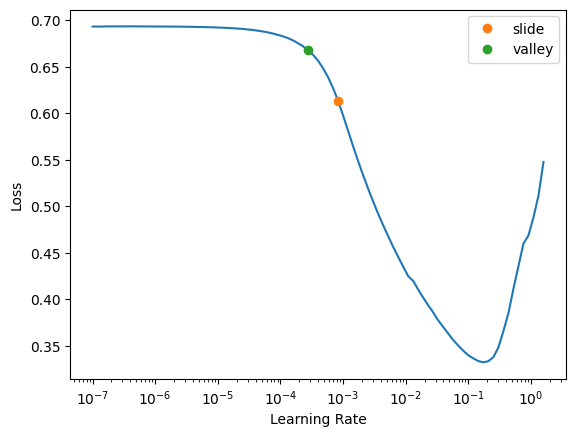

In [ ]:
learner.freeze()
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(2,6.5e-4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.020789,0.019205,0.995697,03:58
1,0.015094,0.013820,0.996482,02:33


In [ ]:
model_path = "models"
if not os.path.exists(model_path):
  os.makedirs(model_path)

In [ ]:
learner.save("quote-classifier-stage-0")

Path('models/quote-classifier-stage-0.pth')

In [ ]:
learner.export("models/quote-classifier-stage-0.pkl")

Stage - 1

In [ ]:
learner.unfreeze()

SuggestedLRs(slide=0.0004786300996784121, valley=5.754399353463668e-06)

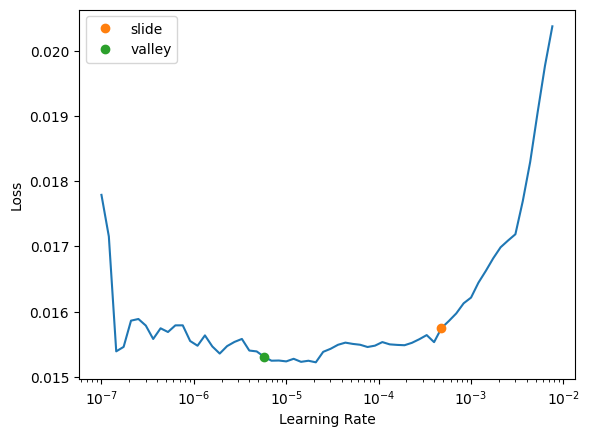

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
doc(slice)

In [ ]:
learner.fit_one_cycle(3,2e-4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.009207,0.008268,0.997893,04:17
1,0.005522,0.004844,0.998702,04:13
2,0.003922,0.003965,0.998917,04:11


In [ ]:
learner.save("quote-classifier-stage-1")

Path('models/quote-classifier-stage-1.pth')

In [ ]:
learner.export("models/quote-classifier-stage-1.pkl")